In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


# Intro:

Now we are going to tell you about 2 different modeling techniques:

  1) Logistic Regression

  2) Random Forest

as well as the data preparation for modelling phase.

### Read data

In [2]:
random_seed = 42

Load the data for every set, train, validation an oot.

In [3]:
df_train = pd.read_excel('train.xlsx')
df_val = pd.read_excel('val.xlsx')
df_oot = pd.read_excel('oot.xlsx')

In [4]:
df_train.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanOriginationYear,LoanMonthsSinceOriginationY,LoanFirstDefaultedCycleNumberQ,bad_aux,population,bad
0,01423531870379082FADC15,541221,2011-11-27 12:43:19.437,NaN,36,Completed,2012-05-11,0.29486,0.2561,0.2461,...,0,0,0.0,84,2011,2,NaN,False,True,False
1,21F03550245626467CAA02D,598171,2012-06-10 09:38:40.310,NaN,36,Current,NaT,0.15538,0.1270,0.1170,...,0,0,0.0,58,2012,2,NaN,False,True,False
2,7ACF3540754952956E4B26B,563981,2012-02-29 20:06:29.270,NaN,36,Current,NaT,0.06828,0.0649,0.0549,...,0,0,0.0,131,2012,2,NaN,False,True,False
3,66F83529568243522008BD3,533292,2011-10-17 12:16:42.963,NaN,36,Current,NaT,0.13220,0.1110,0.1010,...,0,0,0.0,123,2011,2,NaN,False,True,False
4,DAE33528739347746160874,535094,2011-10-24 11:56:04.837,NaN,36,Completed,2013-06-14,0.20200,0.1799,0.1699,...,0,0,0.0,12,2011,2,NaN,False,True,False


In the next step we are loading the object we saved in the previous notebook: iv, psi, and correlation for each of the features

In [6]:
#get the serialized data from previous session
input_d2 = pd.read_pickle('pickle.pkl')
corr_data, features = input_d2['corr_data'], input_d2['features']
df_iv, df_psi = input_d2['iv_df'], input_d2['psi_df']

# Feature Selection

![title](https://drive.google.com/uc?export=view&id=1UFT9Y9DIYgNkeJxALD83zzANh4j5CqVi)

In practice, the problem of dimensionality implies that, given a fixed number of examples, there is a maximum number of attributes from which the efficiency of our classifier degrades rather than increases.

![title](https://drive.google.com/uc?export=view&id=1KV8EnT6Up96NsSOAYuzt4RlXZYm4Pasg)

![title](https://drive.google.com/uc?export=view&id=1y323lbC1Ib70WovCQIKJVopfP3O9O3qW)

#### Techniques to reduce dimensionality:


#### -Selection methods: a subset of characteristics from the original set.
Example: Mutual Information criteria.

For this exercise: Information Value, Population Stability Index & Correlation criteria.

#### -Filtering methods: the new characteristics come from a transformation of the original ones.
Find a transformation y=f(x) that preserves the information about the problem, minimizing the number of components.

Examples: PCA, LDA

The goal of LDA is to reduce dimensionality, preserving as much discriminatory information as possible while maximizing separation between classes. LDA reduces the dimensional space to C-1, where C is the number of classes (target).
    
![title](https://drive.google.com/uc?export=view&id=1NrcG3lvEsfuh8eG93SBjXJDV7_0EyfO4)
    
    
PCA, however, seeks to compress the information in the data, regardless of class (target). Builds the most relevant components or factors from the original variables.
    
![title](https://drive.google.com/uc?export=view&id=1vcpHF0rxSQLloVHgRFtru3nBReb-foMi)
    
PCA is a technique that makes sense to apply in the case of there are high correlations between the variables (an indication that the there is redundant information) as a consequence, few factors will explain much of the total variability.
    
Beware, PCA is sensitive to the scale on which the variables are expressed. Variables may need to be normalized.

In [7]:
# To put it into practice:

from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()
breast_data = breast.data

breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))

final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)

features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)



# Since the original labels are in 0,1 format, you will change the labels to benign and malignant using .replace function
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [9]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))


Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 640x480 with 0 Axes>

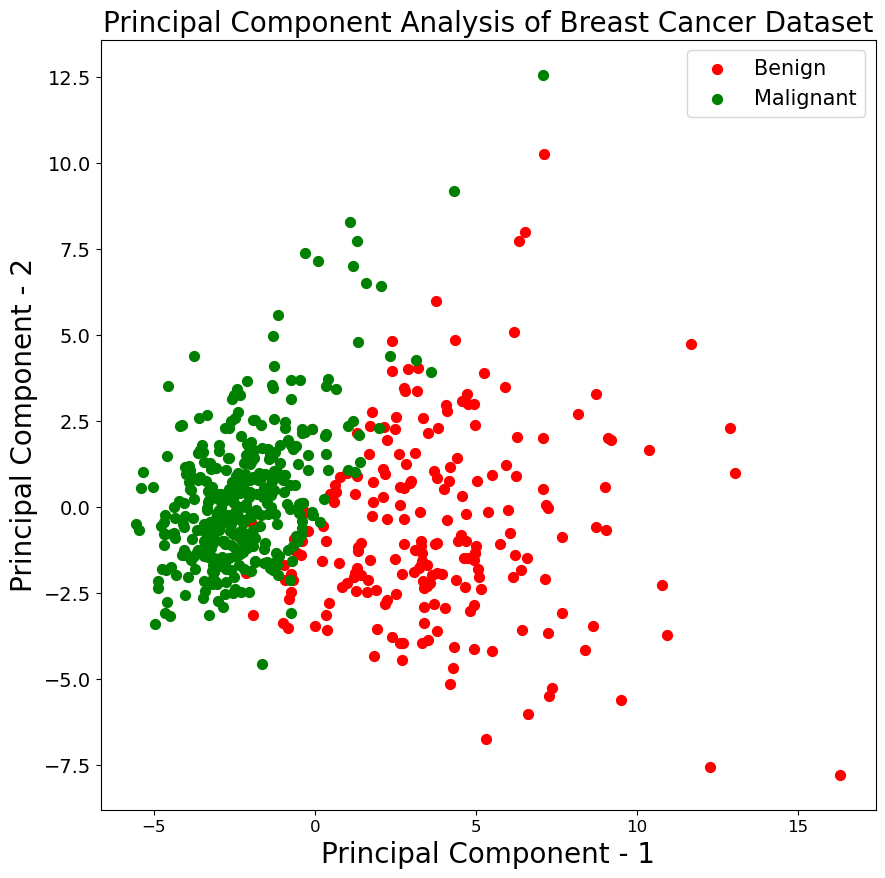

In [10]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


From the above graph, you can observe that the two classes benign and malignant, when projected to a two-dimensional space, can be linearly separable up to some extent.

### For this exercise: Feature Selection Criteria based on IV, PSI & Correlation

### 1. Drop highly correlated features

Take a look to the features wiht highest correlation, and drop those thta are very correlated

In [11]:
corr_data

[('CreditScoreRangeLower',
  1,
  CreditScoreRangeUpper    1.0
  Name: CreditScoreRangeLower, dtype: float64),
 ('CreditScoreRangeUpper',
  1,
  CreditScoreRangeLower    1.0
  Name: CreditScoreRangeUpper, dtype: float64),
 ('CurrentCreditLines',
  2,
  OpenCreditLines          0.958691
  OpenRevolvingAccounts    0.847592
  Name: CurrentCreditLines, dtype: float64),
 ('OpenCreditLines',
  2,
  CurrentCreditLines       0.958691
  OpenRevolvingAccounts    0.883499
  Name: OpenCreditLines, dtype: float64),
 ('TotalCreditLinespast7years',
  1,
  TotalTrades    0.940108
  Name: TotalCreditLinespast7years, dtype: float64),
 ('OpenRevolvingAccounts',
  2,
  CurrentCreditLines    0.847592
  OpenCreditLines       0.883499
  Name: OpenRevolvingAccounts, dtype: float64),
 ('TotalTrades',
  1,
  TotalCreditLinespast7years    0.940108
  Name: TotalTrades, dtype: float64),
 ('TotalProsperPaymentsBilled',
  1,
  OnTimeProsperPayments    0.986707
  Name: TotalProsperPaymentsBilled, dtype: float64),
 ('

In [12]:
#run through the iv ranking, and drop features if they are correlated with any feature with better ranking
feats_sorted = df_iv.feature.values.tolist()

def get_uncorr_feats(corr_data, feats_sorted):
    """Handles the corr_data structure, to drop highlly correlated features

    Args:
        corr_data: List of tuples containing the correlation info
        feats_sorted: List, with the features to be sorted / dropped

    Returns:
        List with the features that have no correlation
    """
    features_keep = feats_sorted[:1]
    for feat in feats_sorted[1:]:
        #capture the correlation tuple
        crr_data = [crr for crr in corr_data if crr[0] == feat] # if feat has correlation

        if len(crr_data):
            #if there is a 'hit' with a feature in features_keep, do not include it
            hit = len(set(crr_data[0][2].index.tolist()) & set(features_keep)) > 0
            if hit:
                print ('Drop: ' + feat)
            else:
                features_keep.append(feat)
        else:
            features_keep.append(feat)
    return features_keep

print ('We are dropping the following features due to the high correlation with others:\n')
features_keep = get_uncorr_feats(corr_data, feats_sorted)


We are dropping the following features due to the high correlation with others:

Drop: CreditScoreRangeUpper
Drop: TotalProsperPaymentsBilled
Drop: LoanOriginalAmount
Drop: CurrentCreditLines
Drop: OpenRevolvingAccounts
Drop: TotalCreditLinespast7years


### 2. Drop features with low IV

As we have said before, features with a IV less than 0.02 is not given us enough information, so in the next step we are dropping them.

In [13]:
# IV filtering with this treshold
TH_IV = 0.02

# capture low IV features
low_iv_feats = df_iv.loc[df_iv.IV < TH_IV, 'feature'].values.tolist()
features_keep_iv = list(set(features_keep) - set(low_iv_feats))

print ('We are dropping the following features due to the poor IV (<{}):'.format(TH_IV))

low_iv_feats

We are dropping the following features due to the poor IV (<0.02):


['AvailableBankcardCredit',
 'ProsperPaymentsOneMonthPlusLate',
 'EmploymentStatusDuration',
 'ListingCategory (numeric)',
 'TradesNeverDelinquent (percentage)',
 'TotalInquiries',
 'Term',
 'RevolvingCreditBalance',
 'PercentFunded',
 'PublicRecordsLast10Years',
 'DelinquenciesLast7Years',
 'PublicRecordsLast12Months',
 'Recommendations']

### 3. Drop unstable features

In [14]:
# PSI filtering with this treshold
TH_PSI = 0.25

# capture high (unstable) features
high_psi_features = df_psi.loc[df_psi.PSI > TH_PSI, 'feature'].values.tolist()
features_keep_psi = list(set(features_keep_iv) - set(high_psi_features))

print ('We are dropping the following features due to the high PSI (>{}):'.format(TH_PSI))
high_psi_features

We are dropping the following features due to the high PSI (>0.25):


['LoanOriginalAmount',
 'MonthlyLoanPayment',
 'Term',
 'ListingCategory (numeric)']

Note: final_features will contain our final set of features, in order to model the target

In [15]:
final_features = features_keep_psi

print("Number of final features: {}".format(len(final_features)))
final_features

Number of final features: 21


['ProsperPrincipalOutstanding',
 'ScorexChangeAtTimeOfListing',
 'ProsperPrincipalBorrowed',
 'Occupation',
 'BankcardUtilization',
 'ProsperPaymentsLessThanOneMonthLate',
 'InquiriesLast6Months',
 'EmploymentStatus',
 'OnTimeProsperPayments',
 'TotalTrades',
 'OpenCreditLines',
 'IncomeVerifiable',
 'CreditScoreRangeLower',
 'IncomeRange',
 'StatedMonthlyIncome',
 'TradesOpenedLast6Months',
 'OpenRevolvingMonthlyPayment',
 'DebtToIncomeRatio',
 'BorrowerState',
 'TotalProsperLoans',
 'IsBorrowerHomeowner']

# Data Preparation - Bucketing

Data binning (also called Discrete binning or bucketing) is a data pre-processing technique used to reduce the effects of minor observation errors (outliers, for example).

Statistical data binning is a way to group a number of more or less continuous values into a smaller number of "bins". For example, if you have data about a group of people, you might want to arrange their ages into a smaller number of age intervals (for example, grouping every five years together).

In order to group data into bins you can:

  - Manually type a series of values to serve as the bin boundaries.
  - Control the number of values in each bin.
  - Force an even distribution of values into the bins.

In our particular case:
  - we have created a function that, given a number n_bins (function parameter), calculates as many buckets according to the percentiles for each of the continuous features
  - we have created a function that, given a number n_bins (function parameter), calculates as many buckets according to the population distribution for each of the categorical features

Our recommendation is that the work of bucketization has to be to some extent manual, without ever losing sight of the sense of Business.

#### For numerical features

Function that defines buckects for numerical features, with the number of buckets we want , also makes dummies

In [16]:
def get_bucket_numfeature(df, feat_col, n_bins, input_slider=(0., 100.)):
    """Cuts a numeric feature in 'n_bins', balacing data in percentiles

    Args:
        df: Pandas DataFrame with the input data
        feat_col: Name of the column with the input feature
        obj_col: Name of the column with the target
        n_bins: Number of cuts expected
        input_slider: Range considered for the bucketing

    Returns:
        List with the cuts corresponding to this feature
    """
    #get the numeric input from the dual slider
    perc_sliders = [v/100. for v in input_slider]
    var_lims = df[feat_col].quantile([perc_sliders[0], perc_sliders[1]]).values
    v_min, v_max = var_lims[0], var_lims[1]
    #filter the dataset using the slider input
    df_cut = df.loc[(df[feat_col] <= v_max) & (df[feat_col] >= v_min)][[feat_col]]
    cuts = df_cut[feat_col].quantile(np.linspace(perc_sliders[0], perc_sliders[1], n_bins + 1)).values.tolist()
    cuts = sorted(list(set(cuts)))
    return cuts

def format_dummy_col(feat_col, dummy_col):
    """Handles column names for dummy data

    Args:
        feat_col: Name of the column with the input feature
        dummy_col: String of the dummy column

    Returns:
        Dummy column with better formatting
    """
    out = dummy_col.replace("(", "")\
                   .replace("]", "")\
                   .replace(".0", "")\
                   .replace(", ", "|")

    return feat_col + '_' + out

def apply_bucketing_num(df, feat_col, cuts):
    """Applies bucketing to numerical feature

    Args:
        df: Pandas Dataframe with the input data
        feat_col: Name of the column with the input feature
        cuts: Cuts that will be applied to the input data

    Returns:
        Pandas dataframe with dummy columns
    """
    cut_col = '{}_cut'.format(feat_col)
    if len(cuts) == 2:
        cuts = [cuts[0], np.mean(cuts), cuts[1]]

    df[cut_col] = pd.cut(df[feat_col], cuts, include_lowest=True, precision=0)
    if df[cut_col].isna().any():
        df[cut_col] = df[cut_col].cat.add_categories(["NA"])
        df[cut_col] = df[cut_col].fillna("NA")

    dummies_df = pd.get_dummies(df[cut_col], drop_first=True)
    print(dummies_df)
    dummies_df.columns = [format_dummy_col(feat_col, str(col)) for col in dummies_df.columns.values.tolist()]

    return dummies_df

#### For categorical features

Function that defines buckects for categorical features, with the number of buckets we want , also makes dummies

In [17]:
def get_bucket_catfeature(df, feat_col, n_bins):
    """Cuts a categorical feature in 'n_bins', keeping categories with highest volume

    Args:
        df: Pandas DataFrame with the input data
        feat_col: Name of the column with the input feature
        n_bins: Number of cuts expected

    Returns:
        List with the cuts corresponding to this feature
    """
    cuts = df.groupby(feat_col)[feat_col].count().sort_values(ascending=False)[:int(n_bins)].index.values.tolist()

    return cuts

def apply_bucketing_cat(df, feat_col, cuts):
    """Applies bucketing to categorical feature

    Args:
        df: Pandas Dataframe with the input data
        feat_col: Name of the column with the input feature
        cuts: Cuts that will be applied to the input data

    Returns:
        Pandas dataframe with dummy columns
    """
    cut_col = '{}_cut'.format(feat_col)
    df[cut_col] = df[feat_col]
    df.loc[~df[cut_col].isin(cuts), cut_col] = 'Other'
    if df[cut_col].isna().any():
        df[cut_col] = df[cut_col].fillna("NA")

    dummies_df = pd.get_dummies(df[cut_col], prefix=feat_col, drop_first=True)

    return dummies_df

#### For all features - Define Buckets

We define one function to bucketing all features in a Dataframe, well if it a numerical feature well if it is a categorical feature

In [18]:
def get_bucket_feature(df, feat_col, n_bins=6):
    """Trains bucketing in a feature, whether if it is numerical
    or categorical

    Args:
        df: Pandas Dataframe with the input data
        feat_col: Name of the column with the input feature
        n_bins: Cuts that will be applied to the input data

    Returns:
        List with the cuts learned from the data
    """
    if (df[feat_col].dtypes == object) | (df[feat_col].dtypes == bool):
        cuts = get_bucket_catfeature(df, feat_col, n_bins)
    else:
        cuts = get_bucket_numfeature(df, feat_col, n_bins)
    return cuts

def get_bucketing_allfeatures(df, features, n_bins=4):
    """Trains bucketing in all given features of a dataset

    Args:
        df: Pandas Dataframe with the input data
        features: Features which bucketing will be learnt
        n_bins: Cuts that will be applied to the input data

    Returns:
        Dict, containing all features and its corresponding
        bucketing. For example:
         {'feature1': cuts1,
          'feature2': cuts2}
    """
    out_dict = {}
    for feature in features:
        cuts = get_bucket_feature(df, feature, n_bins)
        out_dict[feature] = cuts
    return out_dict

We execute the function that binns each of the variables, and stored the bucket definition in a dictionary

In [19]:
dict_bucketing = get_bucketing_allfeatures(df_train, final_features, n_bins=4)

We save the buckets of features for df of train in dictionary variable

In [20]:
dict_bucketing

{'ProsperPrincipalOutstanding': [0.0, 1494.84, 3978.69, 22894.59],
 'ScorexChangeAtTimeOfListing': [-209.0, -43.0, -13.0, 16.0, 286.0],
 'ProsperPrincipalBorrowed': [1000.0, 3500.0, 5950.0, 10000.0, 72499.0],
 'Occupation': ['Other',
  'Professional',
  'Computer Programmer',
  'Administrative Assistant'],
 'BankcardUtilization': [0.0, 0.24, 0.55, 0.81, 1.82],
 'ProsperPaymentsLessThanOneMonthLate': [0.0, 42.0],
 'InquiriesLast6Months': [0.0, 1.0, 2.0, 27.0],
 'EmploymentStatus': ['Employed', 'Self-employed', 'Other', 'Not employed'],
 'OnTimeProsperPayments': [0.0, 9.0, 16.0, 34.0, 110.0],
 'TotalTrades': [1.0, 14.0, 21.0, 30.0, 114.0],
 'OpenCreditLines': [0.0, 5.0, 8.0, 11.0, 40.0],
 'IncomeVerifiable': [True, False],
 'CreditScoreRangeLower': [600.0, 660.0, 700.0, 740.0, 880.0],
 'IncomeRange': ['$25,000-49,999',
  '$50,000-74,999',
  '$100,000+',
  '$75,000-99,999'],
 'StatedMonthlyIncome': [0.0, 3166.666667, 4604.166667, 6875.0, 466666.666667],
 'TradesOpenedLast6Months': [0.0, 1

#### For all features - Apply Bucket Definitions

Define a function, that  apply bucketing

In [21]:
def apply_bucketing(df, feat_col, cuts):
    """Applies a bucketing schema

    Args:
        df: Pandas Dataframe with the input data
        feat_col: Name of the column with the input feature
        cuts: Cuts that will be applied to the input data

    Returns:
        Pandas DataFrame with columns dummy columns
    """
    if (df[feat_col].dtypes == object) | (df[feat_col].dtypes == bool):
        df_buck = apply_bucketing_cat(df, feat_col, cuts)
    else:
        df_buck = apply_bucketing_num(df, feat_col, cuts)
    return df_buck

We apply bucketing for all features of all df (train validation and OOT)

In [22]:
# Apply the bucketing

# Keep each column dummy columns in independent lists
list_df_tr, list_df_val, list_df_oot = [], [], []
for feat in final_features:
    list_df_tr.append(apply_bucketing(df_train, feat, dict_bucketing[feat]))
    list_df_val.append(apply_bucketing(df_val, feat, dict_bucketing[feat]))
    list_df_oot.append(apply_bucketing(df_oot, feat, dict_bucketing[feat]))

# Then 'vertically' combine them
df_tr_preproc = pd.concat(list_df_tr, axis=1)
df_val_preproc = pd.concat(list_df_val, axis=1)
df_oot_preproc = pd.concat(list_df_oot, axis=1)

# Capture the name of all buckets in our dataset
keep_cols_buck = df_tr_preproc.columns

       (1495.0, 3979.0]  (3979.0, 22895.0]     NA
0                 False              False   True
1                 False              False   True
2                 False              False   True
3                 False              False  False
4                 False              False   True
...                 ...                ...    ...
20700             False              False   True
20701             False              False   True
20702             False              False   True
20703             False              False   True
20704             False              False   True

[20705 rows x 3 columns]
      (1495.0, 3979.0]  (3979.0, 22895.0]     NA
0                False              False   True
1                False              False   True
2                False              False   True
3                False              False   True
4                 True              False  False
...                ...                ...    ...
8869             False         

### Drop highly correlated buckets

We can find buckets (of different features) correlated between them, so we are going drop them

In [23]:
#check buckets correlations
corr = df_tr_preproc[keep_cols_buck].corr()
orig_features = keep_cols_buck.values.tolist()
corr_TH = 0.75
n_corr_list=[]
corr_feats_list=[]
for f in orig_features:
    #get correlation entries for the feature
    corr_f = corr[f][[col for col in orig_features if col!=f]]
    #work with absolute value
    corr_f_abs = corr_f.abs()
    #get features above corr TH
    corr_ht_th = corr_f_abs[corr_f_abs>corr_TH]
    n_corr_list.append(corr_ht_th.shape[0])
    corr_feats_list.append(corr_ht_th)

corr_buckets = [(feat, n, feats_corr) for n, feats_corr, feat in zip(n_corr_list, corr_feats_list, orig_features) if n>0]

In [24]:
print ('We are dropping the following buckets due to the high correlation with others:\n')
glm_cols = get_uncorr_feats(corr_buckets, orig_features)

We are dropping the following buckets due to the high correlation with others:

Drop: ScorexChangeAtTimeOfListing_NA
Drop: ProsperPrincipalBorrowed_NA
Drop: Occupation_Professional
Drop: ProsperPaymentsLessThanOneMonthLate_NA
Drop: OnTimeProsperPayments_NA
Drop: DebtToIncomeRatio_NA
Drop: TotalProsperLoans_NA


# Data Preparation/Preprocessing Summary:

1. Drop features that are highly correlated with others.
2. Drop features with low IV (poor predictive capacity).
3. Drop features with a high PSI (highly unstable).
4. Bucketize the variables:
Although we recommend to do it manually to improve the predictive capacity of the variables and not to lose the sense of Business, we (due to lack of time in this course) will do it automatically: for numerical variables we will break in n equipped buckets (percentiles), for categorical variables we will collect the n-1 most populated categories and the nth will be a category 'Other'.
5. Convert each of the buckets into a dummy variable.
6. Drop buckets (it's actually no longer a bucket, but a dummy variable created from a bucket) that are highly correlated with others.

# Modeling

![title](https://drive.google.com/uc?export=view&id=1f-dbbufUIADqn7gPHg1S2JbqsrPAEXdV)

## Logistic Regression

Logistic regression is a type of regression analysis used to predict the outcome of a categorical variable (a variable that can adopt a limited number of categories) based on independent or predictive variables. It is useful for modeling the probability of an event occurring as a function of other factors. Logistic regression analysis is framed within the set of Generalized Linear Models (GLM) that uses the logit function as a link function. The probabilities that describe the possible outcome of a single test are modeled, as a function of explanatory variables, using a logistic function.

![title](https://drive.google.com/uc?export=view&id=1qlS-ZeCm57lP8oHYRzUeEzsoPWea0FLK)

![title](https://drive.google.com/uc?export=view&id=1jHU6f8Ki1yRj0v6ewmoBr_zK6WpK5M2C)

![title](https://drive.google.com/uc?export=view&id=1zOkiqHPMoIS7B7czcJxDKFB1m_EvnDIo)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [26]:
def get_auc_to_plot(y_true, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
    return fpr, tpr, metrics.auc(fpr, tpr)

def get_auc(y_true, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
    return metrics.auc(fpr, tpr)

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [27]:
# Capture the target in each subset
y_tr, y_val, y_oot = df_train['bad'], df_val['bad'], df_oot['bad']

### Train LR with ALL Features

In [28]:
lr = LogisticRegression(random_state=random_seed)
lr.fit(df_tr_preproc[glm_cols], y_tr)
#solo se entrena con los datos de entrenamiento, no se aplica en este caso los de validacion o los oot

LogisticRegression(random_state=42)

In [29]:
# Predict for all subsets
pred_tr=lr.predict_proba(df_tr_preproc[glm_cols])[:,1]
pred_val=lr.predict_proba(df_val_preproc[glm_cols])[:,1]
pred_oot=lr.predict_proba(df_oot_preproc[glm_cols])[:,1]


In [30]:
# Use the function get_auc to obatin the metrics for the roc_curve
get_auc(y_tr, pred_tr), get_auc(y_val, pred_val), get_auc(y_oot, pred_oot)

(0.70260038828049, 0.7010474507824331, 0.6679625164218543)

Plot curve for train


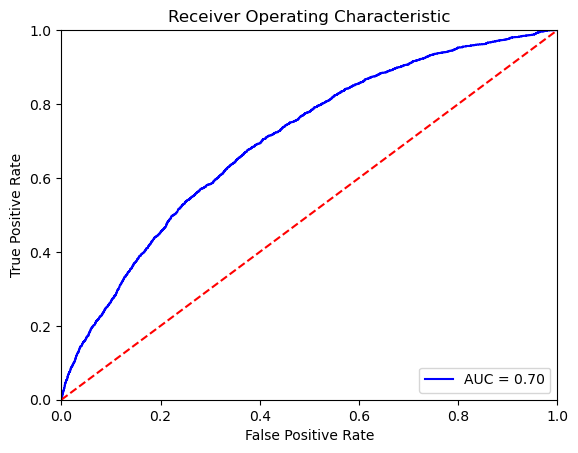

Plot curve for validation


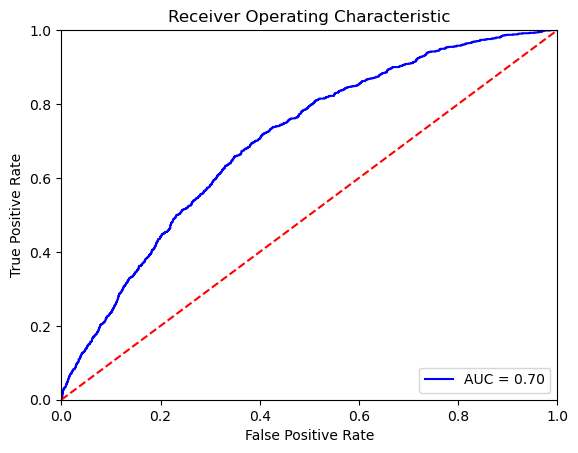

Plot curve for OOT


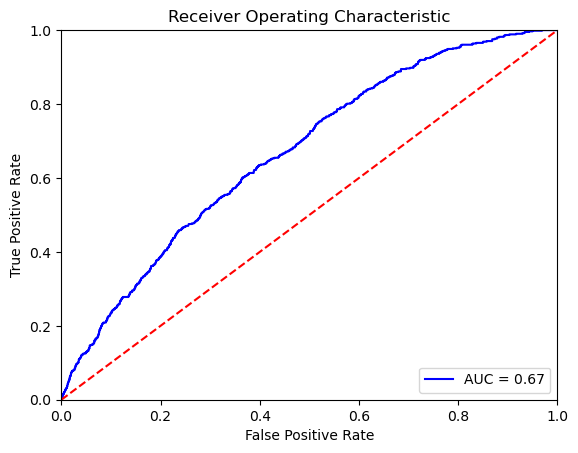

In [31]:
# Use the functions provided to plot the curves
fpr_tr, tpr_tr,roc_auc_tr = get_auc_to_plot(y_tr,pred_tr)
fpr_val, tpr_val,roc_auc_val = get_auc_to_plot(y_val,pred_val)
fpr_oot, tpr_oot,roc_auc_oot = get_auc_to_plot(y_oot,pred_oot)
print("Plot curve for train")
plot_roc_curve(fpr_tr,tpr_tr,roc_auc_tr)
print("Plot curve for validation")
plot_roc_curve(fpr_val,tpr_val,roc_auc_val)
print("Plot curve for OOT")
plot_roc_curve(fpr_oot,tpr_oot,roc_auc_oot)

In [32]:
print ('Number of features: {}'.format(len(glm_cols)))

Number of features: 53


#### Conclusions:

Considering:
- This is an application model, with a limited number of variables, with information declared in many cases
- We have had to drop variables because they are Prosper's own cooks, and we have not incorporated any of our own cooks.

The results of the model are somewhat tight, but sufficient.
If we would like to improve the model, we could start by improving binning (we don't do it here due to lack of time, but it is a good tool to improve the predictive capacity of the model).

Anyway, we have too much variables... in the next steps we will try to reduce them.

### Feature Selection:

###  **P-value based feature selection**

A smaller p-value means that there is stronger evidence against the null hypothesis, this being the hypothesis that B approaches 0.

Steps:
  1. Train the model with all the features
  2. Take those with more p_value (less significance)
  3. Re-train the model

In [33]:
# Get p-values

import scipy.stats as stat
def get_p_vals(lr, X):
    denom = (2.0*(1.0+np.cosh(lr.decision_function(X))))
    denom = np.tile(denom,(X.shape[1],1)).T
    F_ij = np.dot((X/denom).T,X) ## Fisher Information Matrix
    Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
    sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
    z_scores = lr.coef_[0]/sigma_estimates # z-score for each model coefficient
    p_values = [stat.norm.sf(abs(x))*2 for x in z_scores] ### two tailed test for p-values#
    return p_values

def show_lr_summary(p_values, features, lr):
    df_ret = pd.DataFrame({'feature': features,
                           'p_val': p_values,
                           'betas': lr.coef_.tolist()[0]})[['feature', 'betas', 'p_val']]
    return df_ret

p_values = get_p_vals(lr, df_tr_preproc[glm_cols])
#print(show_lr_summary(p_values, glm_cols, lr)) #invoca al dataframe de los pvalue

# remove each bucket with the highest p-value N times
# assess how the AUC changes
N_iterations = len(glm_cols) - 3
glm_cols_pvals = [c for c in glm_cols]

# keep the AUCs in each interation
auc_train, auc_val, auc_oot = [], [], []
# List of tuples where all selected features status will
# be stored per iteration
features_it_pval = []

# for each iteration
for it in range(N_iterations):
    #capture the feature to be dropped
    #in the first iteration we are using the p_values from the model trained 'outside'
    feat_drop = [feat for feat, p in zip(glm_cols_pvals, p_values) if p == max(p_values)][0]
    glm_cols_pvals.remove(feat_drop)
    #re-train the model
    lr_it = LogisticRegression(random_state=random_seed)
    lr_it.fit(df_tr_preproc[glm_cols_pvals], y_tr)
    # Predict for all subsets
    pred_tr = lr_it.predict_proba(df_tr_preproc[glm_cols_pvals])[:, 1]
    pred_val = lr_it.predict_proba(df_val_preproc[glm_cols_pvals])[:, 1]
    pred_oot = lr_it.predict_proba(df_oot_preproc[glm_cols_pvals])[:, 1]
    #get aucs
    auc_train.append(get_auc(y_tr, pred_tr))
    auc_val.append(get_auc(y_val, pred_val))
    auc_oot.append(get_auc(y_oot, pred_oot))
    #get p-values
    p_values = get_p_vals(lr_it, df_tr_preproc[glm_cols_pvals])
    #keep features status at iteration
    features_it_pval.append((it, [c for c in glm_cols_pvals]))

In [34]:
#Si la hipotesis H0= 0 entonces vamos a quitar las variables con p-value altos.
#Si la hipotesis H0 =/ 0 entonces vamos a quitar

Analyze the results of the model on the 3 samples (train/oos/oot) in each of the iterations:

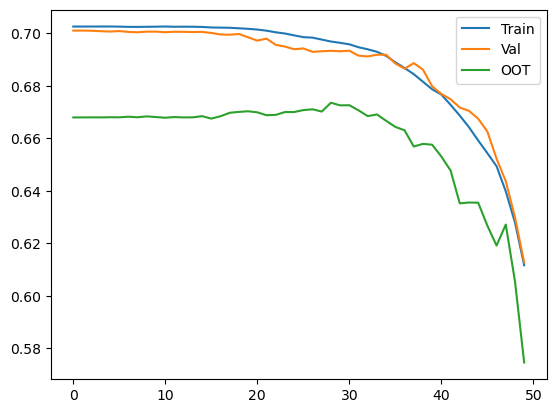

In [35]:
# Plot AUCs in each iteration
iterations = [i for i in range(N_iterations)]
plt.plot(iterations, auc_train, label='Train')
plt.plot(iterations, auc_val, label='Val')
plt.plot(iterations, auc_oot, label='OOT')
plt.legend()
#Como se observa en la grafica al aumentar el numero de iteraciones(quitar variables) se pierde mucha significancia. Pero podemos observar que hasta la iteracion 30
#La regresion es casi igual de explicativa que con mas variables


Note that at iteration 30 (more or less) it stays stable

In [36]:
final_features_bucketing = [feats for it, feats in features_it_pval if it==30][0]
final_features_bucketing

['ProsperPrincipalOutstanding_1495|3979',
 'ProsperPrincipalOutstanding_3979|22895',
 'ProsperPrincipalOutstanding_NA',
 'BankcardUtilization_0.2|0.6',
 'BankcardUtilization_0.6|0.8',
 'InquiriesLast6Months_1|2',
 'InquiriesLast6Months_2|27',
 'OnTimeProsperPayments_34|110',
 'OpenCreditLines_5|8',
 'OpenCreditLines_8|11',
 'OpenCreditLines_11|40',
 'IncomeVerifiable_True',
 'CreditScoreRangeLower_660|700',
 'CreditScoreRangeLower_700|740',
 'CreditScoreRangeLower_740|880',
 'StatedMonthlyIncome_3167|4604',
 'StatedMonthlyIncome_4604|6875',
 'StatedMonthlyIncome_6875|466667',
 'TradesOpenedLast6Months_1|20',
 'OpenRevolvingMonthlyPayment_99|238',
 'DebtToIncomeRatio_0.2|0.3',
 'DebtToIncomeRatio_0.3|10']

#### Train the final model with the interesting features

In [37]:
lr_final = LogisticRegression(random_state = random_seed)
lr_final.fit(df_tr_preproc[final_features_bucketing], y_tr)

LogisticRegression(random_state=42)

In [38]:
pred_tr = lr_final.predict_proba(df_tr_preproc[final_features_bucketing])[:, 1]
pred_val = lr_final.predict_proba(df_val_preproc[final_features_bucketing])[:, 1]
pred_oot = lr_final.predict_proba(df_oot_preproc[final_features_bucketing])[:, 1]

In [39]:
get_auc(y_tr, pred_tr), get_auc(y_val, pred_val), get_auc(y_oot, pred_oot)

(0.6958277463240711, 0.693387709556577, 0.6726181584885214)

Plot curve for train


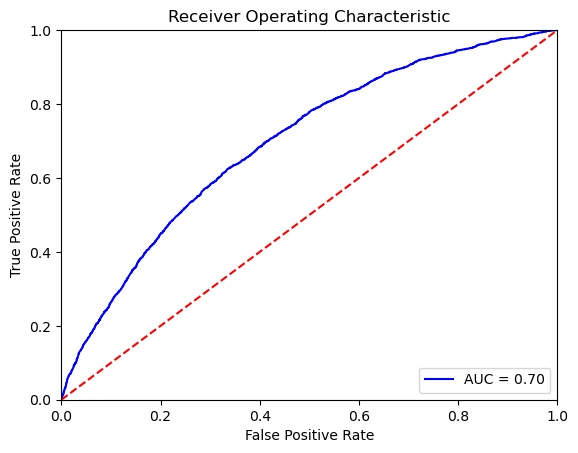

Plot curve for validation


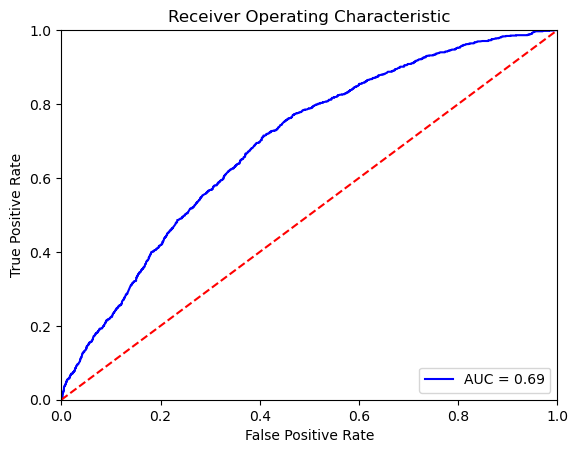

Plot curve for OOT


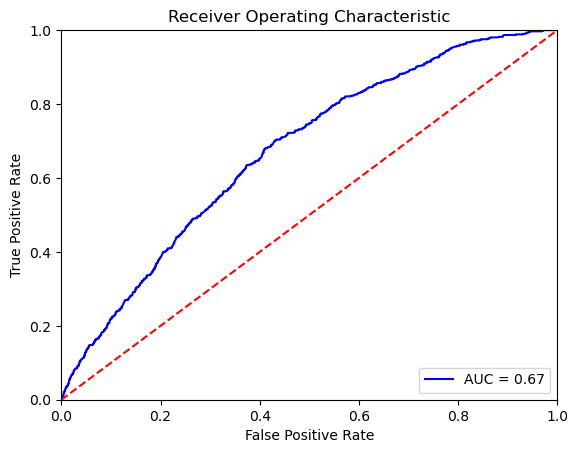

In [40]:
fpr_tr, tpr_tr, roc_auc_tr = get_auc_to_plot(y_tr, pred_tr)
fpr_val, tpr_val, roc_auc_val = get_auc_to_plot(y_val, pred_val)
fpr_oot, tpr_oot, roc_auc_oot = get_auc_to_plot(y_oot, pred_oot)

print("Plot curve for train")
plot_roc_curve(fpr_tr, tpr_tr, roc_auc_tr)
print("Plot curve for validation")
plot_roc_curve(fpr_val, tpr_val, roc_auc_val)
print("Plot curve for OOT")
plot_roc_curve(fpr_oot, tpr_oot, roc_auc_oot)

We are reducing the distance with the OOT sample!! Great!!

In [41]:
print ('Number of features: {}'.format(len(final_features_bucketing)))

Number of features: 22


In [42]:
p_values = get_p_vals(lr_final, df_tr_preproc[final_features_bucketing])
show_lr_summary(p_values, final_features_bucketing, lr_final)

,feature,betas,p_val
0,ProsperPrincipalOutstanding_1495|3979,0.481197,1.241312e-06
1,ProsperPrincipalOutstanding_3979|22895,0.703228,2.111187e-12
2,ProsperPrincipalOutstanding_NA,0.724527,2.713305e-29
3,BankcardUtilization_0.2|0.6,-0.305154,2.060631e-07
4,BankcardUtilization_0.6|0.8,-0.294598,5.064275e-07
5,InquiriesLast6Months_1|2,0.329514,7.854441e-07
6,InquiriesLast6Months_2|27,0.720350,8.870177e-32
7,OnTimeProsperPayments_34|110,-0.604710,8.348514e-07
8,OpenCreditLines_5|8,-0.227084,3.037385e-04
9,OpenCreditLines_8|11,-0.301769,3.203883e-05


### AUC based feature selection

We are going to improve the model in function of the AUC instead of in function of the P_value.

In [43]:
# Try to remove all available features.
# Remove the feature that has the lowest impact in AUC
N_iterations = len(glm_cols) - 3
glm_cols_auc = [c for c in glm_cols]

auc_train, auc_val, auc_oot = [], [], []
features_it_auc = []
for it in range(N_iterations):
    print ('Working for iteration: {}'.format(str(it)))
    #re-train the model
    lr_it = LogisticRegression(random_state=random_seed)
    lr_it.fit(df_tr_preproc[glm_cols_auc], y_tr)
    # Predict for all subsets
    pred_tr = lr_it.predict_proba(df_tr_preproc[glm_cols_auc])[:, 1]
    pred_val = lr_it.predict_proba(df_val_preproc[glm_cols_auc])[:, 1]
    pred_oot = lr_it.predict_proba(df_oot_preproc[glm_cols_auc])[:, 1]
    #get base aucs
    auc_train_it, auc_val_it, auc_oot_it = get_auc(y_tr, pred_tr), get_auc(y_val, pred_val), get_auc(y_oot, pred_oot)
    auc_train.append(auc_train_it)
    auc_val.append(auc_val_it)
    auc_oot.append(auc_oot_it)
    #set up minimum gap
    min_gap = 500
    for feat_eval in glm_cols_auc:
        #use validation AUC only as evaluation metric
        #keep features in iteration it, but the feature under evaluation
        glm_cols_auc_ev = [c for c in glm_cols_auc if c!=feat_eval]
        lr_it_ev = LogisticRegression()
        lr_it_ev.fit(df_tr_preproc[glm_cols_auc_ev], y_tr)
        #predit @ val data
        pred_val = lr_it_ev.predict_proba(df_val_preproc[glm_cols_auc_ev])[:, 1]
        #get auc @ val
        auc_val_it_ev = get_auc(y_val, pred_val)
        #check gap
        gap_val_auc = auc_val_it - auc_val_it_ev
        #capture the feature that has the lowest AUC impact
        if gap_val_auc < min_gap:
            candidate_drop = feat_eval
            min_gap = gap_val_auc
    #remove from the feature set the selected feature
    glm_cols_auc.remove(candidate_drop)
    #keep features status at iteration
    features_it_auc.append((it, [c for c in glm_cols_auc]))

Working for iteration: 0
Working for iteration: 1
Working for iteration: 2
Working for iteration: 3
Working for iteration: 4
Working for iteration: 5
Working for iteration: 6
Working for iteration: 7
Working for iteration: 8
Working for iteration: 9
Working for iteration: 10
Working for iteration: 11
Working for iteration: 12
Working for iteration: 13
Working for iteration: 14
Working for iteration: 15
Working for iteration: 16
Working for iteration: 17
Working for iteration: 18
Working for iteration: 19
Working for iteration: 20
Working for iteration: 21
Working for iteration: 22
Working for iteration: 23
Working for iteration: 24
Working for iteration: 25
Working for iteration: 26
Working for iteration: 27
Working for iteration: 28
Working for iteration: 29
Working for iteration: 30
Working for iteration: 31
Working for iteration: 32
Working for iteration: 33
Working for iteration: 34
Working for iteration: 35
Working for iteration: 36
Working for iteration: 37
Working for iteration:

Plot AUCs in each iteration

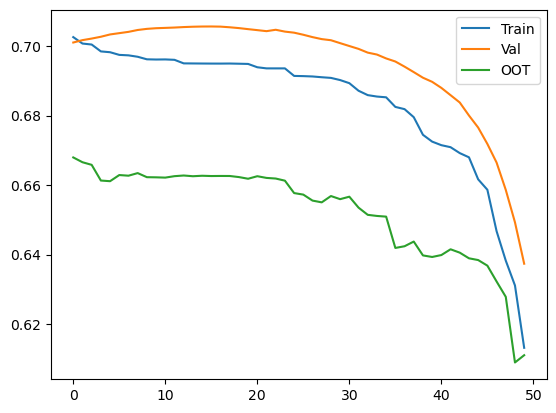

In [44]:
iterations = [i for i in range(N_iterations)]
plt.plot(iterations, auc_train, label='Train')
plt.plot(iterations, auc_val, label='Val')
plt.plot(iterations, auc_oot, label='OOT')
plt.legend()
#cuando la validacion sube es por overfiting al quitar variables, dado que una metrica no puede subir al quitar variables. Asi mismo, al quitar variables no debe mejorar al punto inicial

In [45]:
# get the iteration where it stays stable
final_features_bucketing_auc = [feats for it, feats in features_it_auc if it==30][0]
final_features_bucketing_auc

['ProsperPrincipalOutstanding_1495|3979',
 'ProsperPrincipalOutstanding_3979|22895',
 'ProsperPrincipalOutstanding_NA',
 'ScorexChangeAtTimeOfListing_-43|-13',
 'ScorexChangeAtTimeOfListing_-13|16',
 'ScorexChangeAtTimeOfListing_16|286',
 'BankcardUtilization_0.2|0.6',
 'BankcardUtilization_0.6|0.8',
 'BankcardUtilization_0.8|1.8',
 'InquiriesLast6Months_1|2',
 'InquiriesLast6Months_2|27',
 'IncomeVerifiable_True',
 'CreditScoreRangeLower_700|740',
 'CreditScoreRangeLower_740|880',
 'IncomeRange_$25,000-49,999',
 'IncomeRange_$50,000-74,999',
 'IncomeRange_$75,000-99,999',
 'IncomeRange_Other',
 'TradesOpenedLast6Months_1|20',
 'DebtToIncomeRatio_0.3|10',
 'BorrowerState_Other',
 'IsBorrowerHomeowner_True']

#### Train the final model with the interesting features

In [46]:
## Call the logistic regression and train it
lr_final = LogisticRegression(random_state=random_seed)
lr_final.fit(df_tr_preproc[final_features_bucketing_auc], y_tr)

LogisticRegression(random_state=42)

In [47]:
## Obtain the probabilities
# Predict for all subsets
pred_tr=lr_final.predict_proba(df_tr_preproc[final_features_bucketing_auc])[:,1]
pred_val=lr_final.predict_proba(df_val_preproc[final_features_bucketing_auc])[:,1]
pred_oot=lr_final.predict_proba(df_oot_preproc[final_features_bucketing_auc])[:,1]


In [48]:
## Obtain metrics for this model
get_auc(y_tr, pred_tr), get_auc(y_val, pred_val), get_auc(y_oot, pred_oot)

(0.6871635643406846, 0.6992145115438774, 0.653510472875179)

Plot curve for train


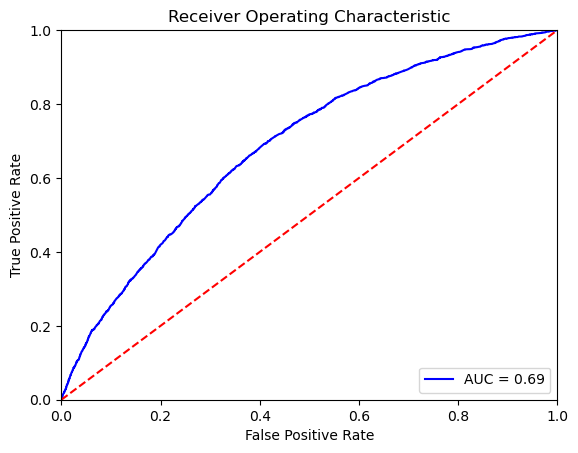

Plot curve for validation


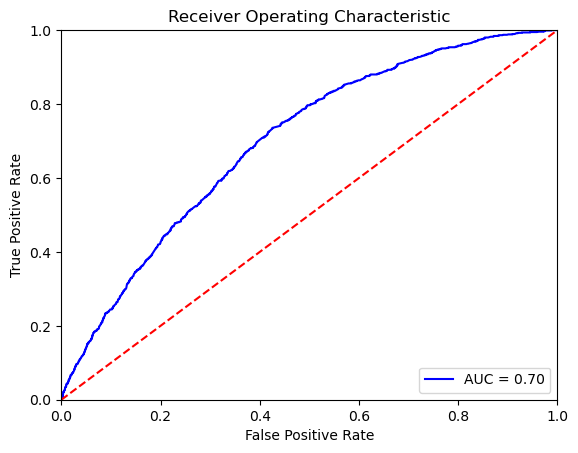

Plot curve for OOT


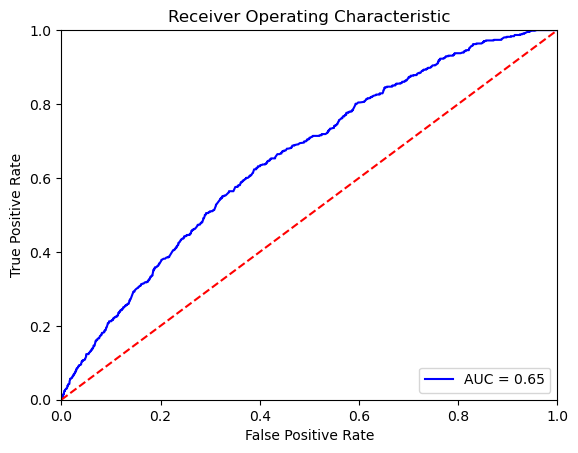

In [49]:
## Plot the curves
fpr_tr, tpr_tr, roc_auc_tr = get_auc_to_plot(y_tr, pred_tr)
fpr_val, tpr_val, roc_auc_val = get_auc_to_plot(y_val, pred_val)
fpr_oot, tpr_oot, roc_auc_oot = get_auc_to_plot(y_oot, pred_oot)

print("Plot curve for train")
plot_roc_curve(fpr_tr, tpr_tr, roc_auc_tr)
print("Plot curve for validation")
plot_roc_curve(fpr_val, tpr_val, roc_auc_val)
print("Plot curve for OOT")
plot_roc_curve(fpr_oot, tpr_oot, roc_auc_oot)

# Gain Table

In [50]:
def get_gain_table_cami(pred, df, col_target='bad', n_buckets=10):
    """Generate the gain table given a population, and its predictions

    Args:
        pred: np.array / pd.Series containing predictions
        df: Pandas DataFrame containing the population to be assesed
        col_target: Name of the target column
        n_buckets: Number of buckets for the gain table

    Returns:
        Pandas DataFrame representing the gain table
    """
    df['pred'] = pred
    df['pred_cut'] = pd.cut(df['pred'], df['pred'].quantile(np.linspace(0, 1, num=n_buckets + 1)), include_lowest=True)

    gain_table = df[['pred_cut','population','bad']].rename(columns={'population':'N_population', 'bad':'N_bad'}).groupby('pred_cut').sum()#

    #gain_table.columns = ['N', 'avg_pred', 'BR', 'N_bads']
    gain_table['N_goods'] = gain_table['N_population'] - gain_table['N_bad']
    gain_table['BR'] = gain_table['N_bad'] / gain_table['N_population']
    gain_table['pct_bad_acum'] = 100. * gain_table['N_bad'].cumsum() / gain_table['N_bad'].sum()
    gain_table['pct_approv_acum'] = 100. * gain_table['N_population'].cumsum() / gain_table['N_population'].sum()
    gain_table

    return gain_table

print('Let´s check the Gain Table on the OOT population:')
get_gain_table_cami(pred_oot, df_oot)

# El punto de corte a elegir de acuerdo a este metodo lo podemos seleccionar a partir del punto donde se empieza a perder dinero, esto nos ayudaria a calcular el threshold objetivo para hacer el corte




Let´s check the Gain Table on the OOT population:


,N_population,N_bad,N_goods,BR,pct_bad_acum,pct_approv_acum
pred_cut,,,,,,
"(0.0071600000000000006, 0.0305]",770,12,758,0.015584,1.973684,10.001299
"(0.0305, 0.0421]",785,30,755,0.038217,6.907895,20.197428
"(0.0421, 0.0534]",757,45,712,0.059445,14.309211,30.029874
"(0.0534, 0.0638]",768,47,721,0.061198,22.039474,40.005195
"(0.0638, 0.0777]",791,52,739,0.065740,30.592105,50.279257
"(0.0777, 0.0913]",748,53,695,0.070856,39.309211,59.994805
"(0.0913, 0.108]",770,76,694,0.098701,51.809211,69.996103
"(0.108, 0.133]",772,78,694,0.101036,64.638158,80.023380
"(0.133, 0.172]",772,96,676,0.124352,80.427632,90.050656


![title](https://drive.google.com/uc?export=view&id=1KDqMco5pAZC8jIsk3q01SstiUbHV83zW)

Business Case:

![title](https://drive.google.com/uc?export=view&id=12OQE6tsFL0lYY4V3XCASHDYVZJFgk-6o)

Once we have established the cut-off:

![title](https://drive.google.com/uc?export=view&id=1jTovC3mPu-fl3VvL2fCDh9CCvJzZsHSf)

In [51]:
# gain table for training sample
# get_gain_table(pred_tr, df_train)

# ENSEMBLE METHODS

Ensemble methods combine several estimators to produce a better predictive performance
Group weak learner into a powerful learner
There are different techniques to build ensemble methods:

    .Bagging
    
    .Boosting
    

### BAGGING VS BOOSTING

![title](https://drive.google.com/uc?export=view&id=1I90rntQBZgJZ3QpFnv3rQNIRutYBe3AN)

### BOOSTING

In each iteration the algorithm assigns a higher weigth to the instances that were wrongly classified previously.

In the first iteration all instance weigths are the same


![title](https://drive.google.com/uc?export=view&id=1n_huYRuBc28J3mEVmyAKUGBRAcy3x2xY)

ALGORITHMS:

    AdaBoost
    Gradient Boosted Tree
    Extreme Gradient Boosting (XGBoost)

### BAGGING

. Create k bootstrap samples D1.....Dk

. Train estimator on each Di

. Classify new instance by majority vote

![title](https://drive.google.com/uc?export=view&id=1_o5yHpcK8bX4fTqJxRXE3bRZBXZ-72hc)

## Random Forest

Random forest consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

![title](https://drive.google.com/uc?export=view&id=1fJ_7AhtSderAJvNCGUUOBmGGb4Gwelr2)

The fundamental concept behind random forest is:
    
  A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models

The main advantages of random forests are:

  - To be one of the most accurate learning algorithms available
  - Running efficiently in large databases
  - Handle hundreds of input variables without excluding any
  - Give estimates of which variables are important in classification

Note: RF also requires lighther preprocessing
  
  -> we have decided to fill NAs with a value lower than its minimum

In [52]:
dtypes = df_train[final_features].dtypes
num_feats = dtypes[dtypes!=object].index.values.tolist()
cat_feats = dtypes[dtypes==object].index.values.tolist()

def get_nafill_rf_num(df, num_features, gap_min=1e6):
    """Get a dictionary, that will store the value that will be used
    to fill NAs in numeric data.

    Args:
        df: Pandas Dataframe with the input data
        num_features: List with the names of categorical features
        gap_min: Gap between minimum value and filling value

    Returns:
        Dictionary, with the following structure:
        {feature1: fill_val1,
         feature2: fill_val2}
    """
    dict_fill = {}
    for num_feat in num_features:
        dict_fill[num_feat] = df[num_feat].min() - gap_min
    return dict_fill


def apply_nafill_rf_num(df, dict_fillrf):
    """Given a dictionary with the values to be used in NA filling,
    use it to fill NAs.

    Args:
        df: Pandas Dataframe with the input data
        dict_fillrf: Dictionary, that stores filling values

    Returns:
        Pandas Dataframe with NA being filled
    """
    df_out = df.copy()
    for num_feat in dict_fillrf.keys():
        df_out.loc[df_out[num_feat].isna(), num_feat] = dict_fillrf[num_feat]
    return df_out

In [53]:
#get dictionary to fill values from train
dict_fillrf = get_nafill_rf_num(df_train,num_feats )
#apply it to train, val and oot
df_train_fill = apply_nafill_rf_num(df_train,dict_fillrf)
df_val_fill = apply_nafill_rf_num(df_val,dict_fillrf)
df_oot_fill = apply_nafill_rf_num(df_oot,dict_fillrf)

In [54]:
# Keep each column dummy columns in independent lists
# Initialize with the numeric data already filled
list_df_tr, list_df_val, list_df_oot = [df_train_fill[num_feats]], [df_val_fill[num_feats]], [df_oot_fill[num_feats]]
# Add the bucketing results of categorical data
for feat in cat_feats:
    list_df_tr.append(apply_bucketing(df_train, feat, dict_bucketing[feat]))
    list_df_val.append(apply_bucketing(df_val, feat, dict_bucketing[feat]))
    list_df_oot.append(apply_bucketing(df_oot, feat, dict_bucketing[feat]))

# Then combine them column-wise
df_tr_preproc_rf = pd.concat(list_df_tr, axis=1)
df_val_preproc_rf = pd.concat(list_df_val, axis=1)
df_oot_preproc_rf = pd.concat(list_df_oot, axis=1)

# Keep the final column names
keep_cols_rf = df_tr_preproc_rf.columns

### Train RF

In [55]:
# Train a RF-Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,
                            min_samples_leaf=300,
                            max_depth=4,
                            n_jobs=4,
                            random_state=random_seed)
rf.fit(df_tr_preproc_rf[keep_cols_rf], y_tr)

RandomForestClassifier(max_depth=4, min_samples_leaf=300, n_estimators=500,
                       n_jobs=4, random_state=42)

In [56]:
## Obtain the probabilities
pred_tr = rf.predict_proba(df_tr_preproc_rf[keep_cols_rf])[:,1]
pred_val = rf.predict_proba(df_val_preproc_rf[keep_cols_rf])[:,1]
pred_oot = rf.predict_proba(df_oot_preproc_rf[keep_cols_rf])[:,1]


In [57]:
## Obtain metrics
auc_tr = get_auc(y_tr,pred_tr)
auc_val = get_auc(y_val,pred_val)
auc_ooc = get_auc(y_oot,pred_oot)

auc_tr,auc_val,auc_ooc

(0.6971037161099594, 0.6929565742979356, 0.6505948979061673)

### Show Feature importance

In [58]:
imp_df = pd.DataFrame({'feature': keep_cols_rf,
                       'importance': rf.feature_importances_})
print('Number of features: {}'.format(len(imp_df)))
imp_df.sort_values(by='importance', ascending=False)

Number of features: 31


,feature,importance
11,StatedMonthlyIncome,0.220997
5,InquiriesLast6Months,0.103055
14,DebtToIncomeRatio,0.094805
13,OpenRevolvingMonthlyPayment,0.085841
10,CreditScoreRangeLower,0.078796
9,IncomeVerifiable,0.058817
1,ScorexChangeAtTimeOfListing,0.054742
8,OpenCreditLines,0.051934
6,OnTimeProsperPayments,0.044392
12,TradesOpenedLast6Months,0.038415


### Ways to find the best parameters for a RF Classifier:
  - Manual search
  - Grid search
  - Random search

GridSearchCV is a scikit-learn class that allows us to systematically evaluate and select the parameters of a model.
By indicating a model and the parameters to be tested, we can evaluate the performance of the model as a function
of the parameters by means of cross validation. In case we want to evaluate models with random parameters there is
the RandomizedSearchCV method.

In [69]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

cv_params = {'n_estimators': [600], # The number of trees in the forest
             'max_depth': [5], # The maximum depth of the tree
             'min_samples_leaf': [200], # The minimum number of samples required to be at a leaf node
             'max_features': [15] # The number of features to consider when looking for the best split'
            }

optimized_RF_GS = GridSearchCV(RandomForestClassifier(random_state=random_seed), # Estimator: the model to be evaluated
                               cv_params, # Param_grid: a dictionary indicating the parameters to be evaluated
                               scoring = "roc_auc",
                               cv = 5, # cv: the number of sets into which the data are divided for cross validation
                               n_jobs = -1) # n_jobs: Number of jobs to run in parallel. -1 means using all processors
optimized_RF_GS.fit(df_tr_preproc_rf[keep_cols_rf], y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5], 'max_features': [15],
                         'min_samples_leaf': [200], 'n_estimators': [600]},
             scoring='roc_auc')

In [70]:
### Parameters for best model: ###
print('BEST PARAMETERS for RF Classifier:')
valores2 = optimized_RF_GS.best_params_
valores
valores2

BEST PARAMETERS for RF Classifier:


{'max_depth': 5,
 'max_features': 15,
 'min_samples_leaf': 200,
 'n_estimators': 600}

In [ ]:
#Estimacion 2da
#{'max_depth': 7,
# 'max_features': 10,
#'min_samples_leaf': 100,
# 'n_estimators': 650}

In [ ]:
#Estimacion base
#{'max_depth': 5,
 #'max_features': 15,
 #'min_samples_leaf': 200,
 #'n_estimators': 600}

In [71]:
## Obtain the probabilities
pred_tr_final=optimized_RF_GS.predict_proba(df_tr_preproc[keep_cols_rf])[:,1]
pred_val_final=optimized_RF_GS.predict_proba(df_val_preproc[keep_cols_rf])[:,1]
pred_oot_final=optimized_RF_GS.predict_proba(df_oot_preproc[keep_cols_rf])[:,1]

KeyError: "['ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'ProsperPrincipalBorrowed', 'BankcardUtilization', 'ProsperPaymentsLessThanOneMonthLate', 'InquiriesLast6Months', 'OnTimeProsperPayments', 'TotalTrades', 'OpenCreditLines', 'IncomeVerifiable', 'CreditScoreRangeLower', 'StatedMonthlyIncome', 'TradesOpenedLast6Months', 'OpenRevolvingMonthlyPayment', 'DebtToIncomeRatio', 'TotalProsperLoans', 'IsBorrowerHomeowner'] not in index"

In [ ]:
## Obtain the metrics


# Other ways to measure model performance

  - Precision: proportion of correct positive classifications (true positives) from cases that are predicted as positive.
  - Recall: Proportion of correct positive classifications (true positives) from cases that are actually positive.
    
Specially important when very unbalanced samples!

![title](https://drive.google.com/uc?export=view&id=1KZw--Ynrq6dPd706QjbR5urQU2dumXXS)

![title](https://drive.google.com/uc?export=view&id=10PFtxdAT9xR-iMxroLLfK6CfjaMt-WFD)

![title](https://drive.google.com/uc?export=view&id=19qrndOe8EBemvI9e9hZ4fcSBa7U910my)

In [73]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

model_tx = 'LR' #'RF'
#model = lr_final_auc.predict_proba(df_oot_preproc[final_features_bucketing_auc])[:, 1]
model = rf.predict_proba(df_oot_preproc_rf[keep_cols_rf])[:, 1]
thresholds = [0.0913]

for threshold in thresholds:

        y_pred_OOT = model > threshold
        print('The precision for the {} model with {} threshold is: {}'.format(model_tx, threshold, precision_score(y_oot, y_pred_OOT)))
        print('The recall for the {} model with {} threshold is: {}'.format(model_tx, threshold,recall_score(y_oot, y_pred_OOT)))

The precision for the LR model with 0.0913 threshold is: 0.10621761658031088
The recall for the LR model with 0.0913 threshold is: 0.7417763157894737


# Selecting the best model: Explainability

**The difference between explainability and interpretability**
    
* Interpretability is about the extent to which a cause and effect can be observed within a system. That is, the extent to which you can predict what will happen given a change in input or parameters.
* Explainability is the extent to which the internal mechanics of a machine / deep learning system can be explained in human terms, that is, explaining why something is happening.

![title](https://drive.google.com/uc?export=view&id=1p1z8ilvNkMrQEh4LDzW6dMRf0U_wJnkD)

A quick look at Google Scholar is enough to see different definitions of Explainability.
* Definition 1, Science of comprehending what a model did, or might have done [Leilani H. et altrum 2019]
* Definition 2, Ability to explain or to present understandable terms to a human [Finale Doshi-Velez and Been Kim 2017]
* Definition 3, Use of machine-learning models for the extraction of relevant knowledge about domain relationships contained in data [W. James Murdoch et altrum 2019]

![title](https://drive.google.com/uc?export=view&id=1ZvxIpP9Hx9dBV23djjDr0hiDzqamphkE)

### 1. Logistic Regression Results:

In [75]:
model = lr_final_auc
features = final_features_bucketing_auc
model_tx = 'LR'
thresholds = [0.0913]

NameError: name 'lr_final_auc' is not defined

In [ ]:
# Logistic Results
print ('LOGISTIC REGRESSION RESULTS\n')

pred_tr = model.predict_proba(df_tr_preproc[features])[:, 1]
pred_val = model.predict_proba(df_val_preproc[features])[:, 1]
pred_oot = model.predict_proba(df_oot_preproc[features])[:, 1]

print ('''- AUC
       IT (train)\t{:.2f}
       OOS\t\t{:.2f}
       OOT\t\t{:.2f}'''\
       .format(get_auc(y_tr, pred_tr), get_auc(y_val, pred_val), get_auc(y_oot, pred_oot)))

for threshold in thresholds:
        y_pred_OOT = pred_oot > threshold
        print('\n- Precision {} model with {:.3f} threshold:\t{:.2f}'.format(model_tx, threshold, precision_score(y_oot, y_pred_OOT)))
        print('- Recall {} model with {:.3f} threshold:\t\t{:.2f}'.format(model_tx, threshold,recall_score(y_oot, y_pred_OOT)))


print ('\n- Number of features: {}'.format(len(final_features_bucketing_auc)))


print ('\n- Model intercept (bias): {:.2f}'.format(model.intercept_[0]))

#### Global explanations of logistic regression
These can be done just by looking at the combination of features and weights. The higher the weight, the closer that feature brings you to being a '1' in the model.

In [ ]:
print('We can create the table ourselves easily. Here are the top 5 features')
pd.DataFrame({'feature':features, 'weight':model.coef_[0]}).sort_values('weight', ascending=False).set_index('feature').head()

In [76]:
import shap

In [77]:
explainer = shap.Explainer(
    model, df_tr_preproc[features], feature_names=features
)
shap_values = explainer(df_val_preproc[features])

KeyError: "None of [Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',\n       'mean smoothness', 'mean compactness', 'mean concavity',\n       'mean concave points', 'mean symmetry', 'mean fractal dimension',\n       'radius error', 'texture error', 'perimeter error', 'area error',\n       'smoothness error', 'compactness error', 'concavity error',\n       'concave points error', 'symmetry error', 'fractal dimension error',\n       'worst radius', 'worst texture', 'worst perimeter', 'worst area',\n       'worst smoothness', 'worst compactness', 'worst concavity',\n       'worst concave points', 'worst symmetry', 'worst fractal dimension'],\n      dtype='object')] are in the [columns]"

In [ ]:
# Logistic Results
print ('LOGISTIC REGRESSION RESULTS\n')

pred_tr = model.predict_proba(df_tr_preproc[features])[:, 1]
pred_val = model.predict_proba(df_val_preproc[features])[:, 1]
pred_oot = model.predict_proba(df_oot_preproc[features])[:, 1]

print ('''- AUC
       IT (train)\t{:.2f}
       OOS\t\t{:.2f}
       OOT\t\t{:.2f}'''\
       .format(get_auc(y_tr, pred_tr), get_auc(y_val, pred_val), get_auc(y_oot, pred_oot)))

for threshold in thresholds:
        y_pred_OOT = pred_oot > threshold
        print('\n- Precision {} model with {:.3f} threshold:\t{:.2f}'.format(model_tx, threshold, precision_score(y_oot, y_pred_OOT)))
        print('- Recall {} model with {:.3f} threshold:\t\t{:.2f}'.format(model_tx, threshold,recall_score(y_oot, y_pred_OOT)))


print ('\n- Number of features: {}'.format(len(final_features_bucketing_auc)))


print ('\n- Model intercept (bias): {:.2f}'.format(model.intercept_[0]))

#### Global explanations of logistic regression
These can be done just by looking at the combination of features and weights. The higher the weight, the closer that feature brings you to being a '1' in the model.

In [ ]:
print('We can create the table ourselves easily. Here are the top 5 features')
pd.DataFrame({'feature':features, 'weight':model.coef_[0]}).sort_values('weight', ascending=False).set_index('feature').head()

In [ ]:
explainer = shap.Explainer(
    model, df_tr_preproc[features], feature_names=features
)
shap_values = explainer(df_val_preproc[features])

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
ind = 0
shap.plots.waterfall(shap_values[ind])


### 2. Random Forest Results:

In [78]:
model = optimized_RF_GS.best_estimator_
features = final_features_bucketing_auc
model_tx = 'RF'
pred_tr_GS = optimized_RF_GS.predict_proba(df_tr_preproc_rf[keep_cols_rf])[:, 1]
pred_val_GS = optimized_RF_GS.predict_proba(df_val_preproc_rf[keep_cols_rf])[:, 1]
pred_oot_GS = optimized_RF_GS.predict_proba(df_oot_preproc_rf[keep_cols_rf])[:, 1]

In [79]:
# Train a RF-Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,
                            min_samples_leaf=300,
                            max_depth=4,
                            n_jobs=4,
                            random_state=random_seed)
rf.fit(df_tr_preproc_rf[keep_cols_rf], y_tr)

RandomForestClassifier(max_depth=4, min_samples_leaf=300, n_estimators=500,
                       n_jobs=4, random_state=42)

In [80]:
for col in keep_cols_rf:
    if df_tr_preproc_rf[col].dtypes == bool:
        df_tr_preproc_rf = df_tr_preproc_rf.astype({col: float})
df_tr_preproc_rf

,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,ProsperPrincipalBorrowed,BankcardUtilization,ProsperPaymentsLessThanOneMonthLate,InquiriesLast6Months,OnTimeProsperPayments,TotalTrades,OpenCreditLines,IncomeVerifiable,...,EmploymentStatus_Other,EmploymentStatus_Self-employed,"IncomeRange_$25,000-49,999","IncomeRange_$50,000-74,999","IncomeRange_$75,000-99,999",IncomeRange_Other,BorrowerState_FL,BorrowerState_NY,BorrowerState_Other,BorrowerState_TX
0,-1000000.00,-1000209.0,-999000.0,0.49,-1000000.0,1,-1000000.0,36,8,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1000000.00,-1000209.0,-999000.0,0.35,-1000000.0,2,-1000000.0,9,9,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1000000.00,-1000209.0,-999000.0,0.43,-1000000.0,0,-1000000.0,31,12,True,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1158.02,30.0,3000.0,0.07,0.0,0,23.0,47,19,True,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1000000.00,-1000209.0,-999000.0,0.21,-1000000.0,1,-1000000.0,25,11,True,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20700,-1000000.00,-1000209.0,-999000.0,0.44,-1000000.0,0,-1000000.0,20,12,False,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20701,-1000000.00,-1000209.0,-999000.0,0.59,-1000000.0,0,-1000000.0,23,8,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20702,-1000000.00,-1000209.0,-999000.0,0.18,-1000000.0,0,-1000000.0,8,6,True,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20703,-1000000.00,-1000209.0,-999000.0,0.91,-1000000.0,1,-1000000.0,27,14,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [81]:
pred_tr = rf.predict_proba(df_tr_preproc_rf[keep_cols_rf])[:, 1]
pred_val = rf.predict_proba(df_val_preproc_rf[keep_cols_rf])[:, 1]
pred_oot = rf.predict_proba(df_oot_preproc_rf[keep_cols_rf])[:, 1]

In [98]:
explainer = shap.TreeExplainer(
    rf
)
shap_values = explainer(df_val_preproc_rf[keep_cols_rf])

In [99]:
shap.plots.beeswarm(shap_values)


ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!

In [ ]:
shap_values = explainer(df_tr_preproc_rf[keep_cols_rf])
# Crear el waterfall plot
shap.plots.waterfall(shap_values[0])
plt.show()

#### Explanations of random forest
We take as an example a client with a score over the threshold, so we know that his application for a loan will be rejected if we implement this model.

#### Explanations of random forest
We take as an example a client with a score over the threshold, so we know that his application for a loan will be rejected if we implement this model.